In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
import glob

In [4]:
import seaborn as sns

## 1. 原始数据分段

In [5]:
sample_data = './data/raw/driving/AA00002.csv'

In [6]:
rawdf = pd.read_csv(sample_data)

### 观察数据

In [7]:
rawdf

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage
0,AA00002,AAA9101002,312,116.216516,28.223563,1,0,0,0,0,2018-08-04 02:29:30,93,8865
1,AA00002,AAA9101002,312,116.216321,28.223723,1,0,0,0,0,2018-08-04 02:29:32,93,8865
2,AA00002,AAA9101002,312,116.216126,28.223881,1,0,0,0,0,2018-08-04 02:29:33,93,8865
3,AA00002,AAA9101002,313,116.215935,28.224040,1,0,0,0,0,2018-08-04 02:29:34,93,8865
4,AA00002,AAA9101002,313,116.215745,28.224201,1,0,0,0,0,2018-08-04 02:29:35,92,8865
5,AA00002,AAA9101002,313,116.215555,28.224358,1,0,0,0,0,2018-08-04 02:29:36,91,8865
6,AA00002,AAA9101002,314,116.215370,28.224520,1,0,0,0,0,2018-08-04 02:29:37,91,8865
7,AA00002,AAA9101002,315,116.215190,28.224680,1,0,0,0,0,2018-08-04 02:29:38,91,8865
8,AA00002,AAA9101002,314,116.215010,28.224843,1,0,0,0,0,2018-08-04 02:29:39,91,8865
9,AA00002,AAA9101002,314,116.214828,28.225003,1,0,0,0,0,2018-08-04 02:29:40,90,8865


In [8]:
rawdf.describe()

,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,gps_speed,mileage
count,60443.000000,60443.000000,60443.000000,60443.000000,60443.0,60443.0,60443.0,60443.0,60443.000000,60443.000000
mean,179.582996,115.973778,28.651315,0.958341,0.0,0.0,0.0,0.0,42.003474,9318.498221
std,112.027232,0.184538,0.425120,0.199811,0.0,0.0,0.0,0.0,37.306885,238.961103
min,0.000000,115.758381,27.560953,0.000000,0.0,0.0,0.0,0.0,0.000000,8865.000000
25%,89.000000,115.879482,28.586775,1.000000,0.0,0.0,0.0,0.0,0.000000,9119.000000
50%,175.000000,115.914196,28.675391,1.000000,0.0,0.0,0.0,0.0,35.000000,9350.000000
75%,273.000000,115.972130,28.704920,1.000000,0.0,0.0,0.0,0.0,84.000000,9556.000000
max,359.000000,116.999760,29.998830,1.000000,0.0,0.0,0.0,0.0,110.000000,9614.000000


In [9]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60443 entries, 0 to 60442
Data columns (total 13 columns):
vehicleplatenumber    60443 non-null object
device_num            60443 non-null object
direction_angle       60443 non-null int64
lng                   60443 non-null float64
lat                   60443 non-null float64
acc_state             60443 non-null int64
right_turn_signals    60443 non-null int64
left_turn_signals     60443 non-null int64
hand_brake            60443 non-null int64
foot_brake            60443 non-null int64
location_time         60443 non-null object
gps_speed             60443 non-null int64
mileage               60443 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 6.0+ MB


In [10]:
len(rawdf)

60443

### 预处理

In [11]:
import time

In [12]:
rawdf['timestamp'] = rawdf['location_time'].apply(lambda x: time.mktime(time.strptime(x,'%Y-%m-%d %H:%M:%S')))

In [13]:
rawdf

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage,timestamp
0,AA00002,AAA9101002,312,116.216516,28.223563,1,0,0,0,0,2018-08-04 02:29:30,93,8865,1.533321e+09
1,AA00002,AAA9101002,312,116.216321,28.223723,1,0,0,0,0,2018-08-04 02:29:32,93,8865,1.533321e+09
2,AA00002,AAA9101002,312,116.216126,28.223881,1,0,0,0,0,2018-08-04 02:29:33,93,8865,1.533321e+09
3,AA00002,AAA9101002,313,116.215935,28.224040,1,0,0,0,0,2018-08-04 02:29:34,93,8865,1.533321e+09
4,AA00002,AAA9101002,313,116.215745,28.224201,1,0,0,0,0,2018-08-04 02:29:35,92,8865,1.533321e+09
5,AA00002,AAA9101002,313,116.215555,28.224358,1,0,0,0,0,2018-08-04 02:29:36,91,8865,1.533321e+09
6,AA00002,AAA9101002,314,116.215370,28.224520,1,0,0,0,0,2018-08-04 02:29:37,91,8865,1.533321e+09
7,AA00002,AAA9101002,315,116.215190,28.224680,1,0,0,0,0,2018-08-04 02:29:38,91,8865,1.533321e+09
8,AA00002,AAA9101002,314,116.215010,28.224843,1,0,0,0,0,2018-08-04 02:29:39,91,8865,1.533321e+09
9,AA00002,AAA9101002,314,116.214828,28.225003,1,0,0,0,0,2018-08-04 02:29:40,90,8865,1.533321e+09


### 统计间隔时间

In [14]:
# 所有数据下移一行，下面用来做差值用
rawdf_shift = rawdf.shift(1)

In [15]:
rawdf_shift

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage,timestamp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA00002,AAA9101002,312.0,116.216516,28.223563,1.0,0.0,0.0,0.0,0.0,2018-08-04 02:29:30,93.0,8865.0,1.533321e+09
2,AA00002,AAA9101002,312.0,116.216321,28.223723,1.0,0.0,0.0,0.0,0.0,2018-08-04 02:29:32,93.0,8865.0,1.533321e+09
3,AA00002,AAA9101002,312.0,116.216126,28.223881,1.0,0.0,0.0,0.0,0.0,2018-08-04 02:29:33,93.0,8865.0,1.533321e+09
4,AA00002,AAA9101002,313.0,116.215935,28.224040,1.0,0.0,0.0,0.0,0.0,2018-08-04 02:29:34,93.0,8865.0,1.533321e+09
5,AA00002,AAA9101002,313.0,116.215745,28.224201,1.0,0.0,0.0,0.0,0.0,2018-08-04 02:29:35,92.0,8865.0,1.533321e+09
6,AA00002,AAA9101002,313.0,116.215555,28.224358,1.0,0.0,0.0,0.0,0.0,2018-08-04 02:29:36,91.0,8865.0,1.533321e+09
7,AA00002,AAA9101002,314.0,116.215370,28.224520,1.0,0.0,0.0,0.0,0.0,2018-08-04 02:29:37,91.0,8865.0,1.533321e+09
8,AA00002,AAA9101002,315.0,116.215190,28.224680,1.0,0.0,0.0,0.0,0.0,2018-08-04 02:29:38,91.0,8865.0,1.533321e+09
9,AA00002,AAA9101002,314.0,116.215010,28.224843,1.0,0.0,0.0,0.0,0.0,2018-08-04 02:29:39,91.0,8865.0,1.533321e+09


In [16]:
# 下一秒时间减去上一秒时间，如果差值过大那么则数据需要分段
rawdf_timestamp_minus = rawdf['timestamp'] - rawdf_shift['timestamp']

In [17]:
rawdf_timestamp_minus.describe()

count    60442.000000
mean         4.416465
std        476.839205
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      96855.000000
Name: timestamp, dtype: float64

In [18]:
rawdf_timestamp_minus

0        NaN
1        2.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       2.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
        ... 
60413    1.0
60414    1.0
60415    1.0
60416    1.0
60417    1.0
60418    1.0
60419    1.0
60420    1.0
60421    1.0
60422    1.0
60423    1.0
60424    1.0
60425    1.0
60426    3.0
60427    1.0
60428    3.0
60429    1.0
60430    1.0
60431    2.0
60432    1.0
60433    1.0
60434    1.0
60435    3.0
60436    1.0
60437    1.0
60438    2.0
60439    1.0
60440    1.0
60441    1.0
60442    1.0
Name: timestamp, Length: 60443, dtype: float64

In [19]:
# 看看差别 1 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 1])

829

In [20]:
# 看看差别 2 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 2])

35

In [21]:
# 看看差别 5 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 5])

11

In [22]:
# 看看差别 10 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 10])

11

In [23]:
# 看看差别 30 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 30])

11

In [24]:
# 看看差别 60 秒以上的有多少
len(rawdf_timestamp_minus[rawdf_timestamp_minus > 100])

11

目前来看间隔 2 秒 的以上的点明显减少，10 秒以上基本不再变化，所以 10 秒可做分界点

In [25]:
rawdf_timestamp_minus_max = int(np.max(rawdf_timestamp_minus).item())

In [26]:
# 统计下间隔时间的分布图
timestamps_minus_lengths = [len(rawdf_timestamp_minus[rawdf_timestamp_minus > length]) for length in range(1, 100)]

In [27]:
timestamps_minus_lengths

[829,
 35,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11]

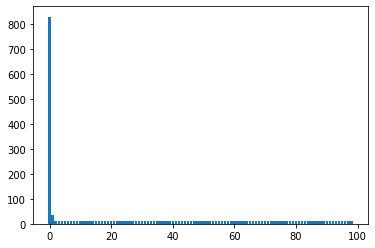

In [28]:
# 间隔时间为 1-100 秒的时候，数量有多少
plt.bar(range(len(timestamps_minus_lengths)), timestamps_minus_lengths)
plt.show()

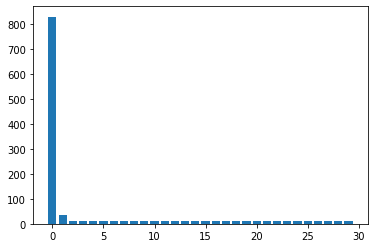

In [29]:
# 间隔时间为 1-30 秒的时候，数量有多少
plt.bar(range(len(timestamps_minus_lengths[:30])), timestamps_minus_lengths[:30])
plt.show()

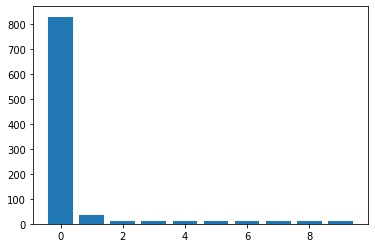

In [30]:
# 间隔时间为 1-10 秒的时候，数量有多少
plt.bar(range(len(timestamps_minus_lengths[:10])), timestamps_minus_lengths[:10])
plt.show()

基本上可以看到间隔时间 3 秒的时候，就稳定差不多了，我们就选 10 秒作为时间段间隔吧。

即如果前一条数据和后一条数据间隔超过 10 秒，那就切开

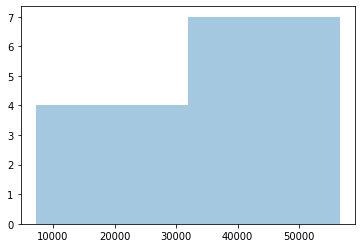

In [31]:
# 看看大约分割点在哪个地方分布较多
sns.distplot(np.where(rawdf_timestamp_minus > 10), kde=False)

看起来在分割点位置比较平均

### 开始分割

将大的 DataFrame 按照时间段划分为小的 DataFrames

In [32]:
rawdf['timestamp_minus'] = rawdf_timestamp_minus

In [33]:
rawdf

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage,timestamp,timestamp_minus
0,AA00002,AAA9101002,312,116.216516,28.223563,1,0,0,0,0,2018-08-04 02:29:30,93,8865,1.533321e+09,NaN
1,AA00002,AAA9101002,312,116.216321,28.223723,1,0,0,0,0,2018-08-04 02:29:32,93,8865,1.533321e+09,2.0
2,AA00002,AAA9101002,312,116.216126,28.223881,1,0,0,0,0,2018-08-04 02:29:33,93,8865,1.533321e+09,1.0
3,AA00002,AAA9101002,313,116.215935,28.224040,1,0,0,0,0,2018-08-04 02:29:34,93,8865,1.533321e+09,1.0
4,AA00002,AAA9101002,313,116.215745,28.224201,1,0,0,0,0,2018-08-04 02:29:35,92,8865,1.533321e+09,1.0
5,AA00002,AAA9101002,313,116.215555,28.224358,1,0,0,0,0,2018-08-04 02:29:36,91,8865,1.533321e+09,1.0
6,AA00002,AAA9101002,314,116.215370,28.224520,1,0,0,0,0,2018-08-04 02:29:37,91,8865,1.533321e+09,1.0
7,AA00002,AAA9101002,315,116.215190,28.224680,1,0,0,0,0,2018-08-04 02:29:38,91,8865,1.533321e+09,1.0
8,AA00002,AAA9101002,314,116.215010,28.224843,1,0,0,0,0,2018-08-04 02:29:39,91,8865,1.533321e+09,1.0
9,AA00002,AAA9101002,314,116.214828,28.225003,1,0,0,0,0,2018-08-04 02:29:40,90,8865,1.533321e+09,1.0


In [34]:
rawdf[0: 1]

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage,timestamp,timestamp_minus
0,AA00002,AAA9101002,312,116.216516,28.223563,1,0,0,0,0,2018-08-04 02:29:30,93,8865,1.533321e+09,NaN


In [35]:
from copy import deepcopy

In [36]:
count = 10
start, end = 0, 0
rawdf_subs = []
for index, row in rawdf.iterrows():
    # 如果间隔时间超过阈值，那么就切开
    if row.timestamp_minus > 10:
        end = index
        # 切开
        rawdf_sub = rawdf[start: end]
        start = end
        # 汇总到列表
        rawdf_subs.append(deepcopy(rawdf_sub))     

看看切开的结果，第一段、第二段数据，验证下没问题。从第二段数据开始，第一条数据的 timestamp_minus 应该大于 10

In [37]:
rawdf_subs[0]

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage,timestamp,timestamp_minus
0,AA00002,AAA9101002,312,116.216516,28.223563,1,0,0,0,0,2018-08-04 02:29:30,93,8865,1.533321e+09,NaN
1,AA00002,AAA9101002,312,116.216321,28.223723,1,0,0,0,0,2018-08-04 02:29:32,93,8865,1.533321e+09,2.0
2,AA00002,AAA9101002,312,116.216126,28.223881,1,0,0,0,0,2018-08-04 02:29:33,93,8865,1.533321e+09,1.0
3,AA00002,AAA9101002,313,116.215935,28.224040,1,0,0,0,0,2018-08-04 02:29:34,93,8865,1.533321e+09,1.0
4,AA00002,AAA9101002,313,116.215745,28.224201,1,0,0,0,0,2018-08-04 02:29:35,92,8865,1.533321e+09,1.0
5,AA00002,AAA9101002,313,116.215555,28.224358,1,0,0,0,0,2018-08-04 02:29:36,91,8865,1.533321e+09,1.0
6,AA00002,AAA9101002,314,116.215370,28.224520,1,0,0,0,0,2018-08-04 02:29:37,91,8865,1.533321e+09,1.0
7,AA00002,AAA9101002,315,116.215190,28.224680,1,0,0,0,0,2018-08-04 02:29:38,91,8865,1.533321e+09,1.0
8,AA00002,AAA9101002,314,116.215010,28.224843,1,0,0,0,0,2018-08-04 02:29:39,91,8865,1.533321e+09,1.0
9,AA00002,AAA9101002,314,116.214828,28.225003,1,0,0,0,0,2018-08-04 02:29:40,90,8865,1.533321e+09,1.0


In [38]:
rawdf_subs[1]

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage,timestamp,timestamp_minus
7207,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:22,0,8963,1.533425e+09,96855.0
7208,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:24,0,8963,1.533425e+09,2.0
7209,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:25,0,8963,1.533425e+09,1.0
7210,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:26,0,8963,1.533425e+09,1.0
7211,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:27,0,8963,1.533425e+09,1.0
7212,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:29,0,8963,1.533425e+09,2.0
7213,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:30,0,8963,1.533425e+09,1.0
7214,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:31,0,8963,1.533425e+09,1.0
7215,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:33,0,8963,1.533425e+09,2.0
7216,AA00002,AAA9101002,12,115.911878,28.669691,1,0,0,0,0,2018-08-05 07:25:34,0,8963,1.533425e+09,1.0


将以上切开的数据持久化保存一下，以后备作他用。

In [39]:
output_folder = './data/segments/driving'

In [40]:
from os.path import basename, dirname, join, exists
from os import makedirs
from pathlib import Path

In [41]:
exists(output_folder) or makedirs(output_folder)

True

In [42]:
# 文件名
stem = Path(sample_data).stem
stem

'AA00002'

In [43]:
for index, rawdf_sub in enumerate(rawdf_subs):
    output_path = join(output_folder, f'{stem}_{index}.csv')
    rawdf_sub.to_csv(output_path)
    print(f'saved to {output_path}')

saved to ./data/segments/driving/AA00002_0.csv
saved to ./data/segments/driving/AA00002_1.csv
saved to ./data/segments/driving/AA00002_2.csv
saved to ./data/segments/driving/AA00002_3.csv
saved to ./data/segments/driving/AA00002_4.csv
saved to ./data/segments/driving/AA00002_5.csv
saved to ./data/segments/driving/AA00002_6.csv
saved to ./data/segments/driving/AA00002_7.csv
saved to ./data/segments/driving/AA00002_8.csv
saved to ./data/segments/driving/AA00002_9.csv
saved to ./data/segments/driving/AA00002_10.csv


## 2. 速度加速度预处理

### 速度处理

先拿其中一个分段的数据来处理

In [44]:
len(rawdf_subs[10])

1238

In [45]:
rawdf_subs[10]

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage,timestamp,timestamp_minus
55432,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:53,0,9589,1.533579e+09,196.0
55433,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:56,0,9589,1.533579e+09,3.0
55434,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:57,0,9589,1.533579e+09,1.0
55435,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:58,0,9589,1.533579e+09,1.0
55436,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:00,0,9589,1.533579e+09,2.0
55437,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:01,0,9589,1.533579e+09,1.0
55438,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:02,0,9589,1.533579e+09,1.0
55439,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:04,0,9589,1.533579e+09,2.0
55440,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:05,0,9589,1.533579e+09,1.0
55441,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:06,0,9589,1.533579e+09,1.0


这段还可以，有完整的加速和减速过程，先分析下速度的情况。

In [46]:
segdf = rawdf_subs[10]

In [47]:
speed = segdf.gps_speed

In [48]:
speed

55432    0
55433    0
55434    0
55435    0
55436    0
55437    0
55438    0
55439    0
55440    0
55441    0
55442    0
55443    0
55444    0
55445    0
55446    0
55447    0
55448    0
55449    0
55450    0
55451    0
55452    0
55453    0
55454    0
55455    0
55456    0
55457    0
55458    0
55459    0
55460    0
55461    0
        ..
56640    0
56641    0
56642    0
56643    0
56644    0
56645    0
56646    0
56647    0
56648    0
56649    0
56650    0
56651    0
56652    0
56653    0
56654    0
56655    0
56656    0
56657    0
56658    0
56659    0
56660    0
56661    0
56662    0
56663    0
56664    0
56665    0
56666    0
56667    0
56668    0
56669    0
Name: gps_speed, Length: 1238, dtype: int64

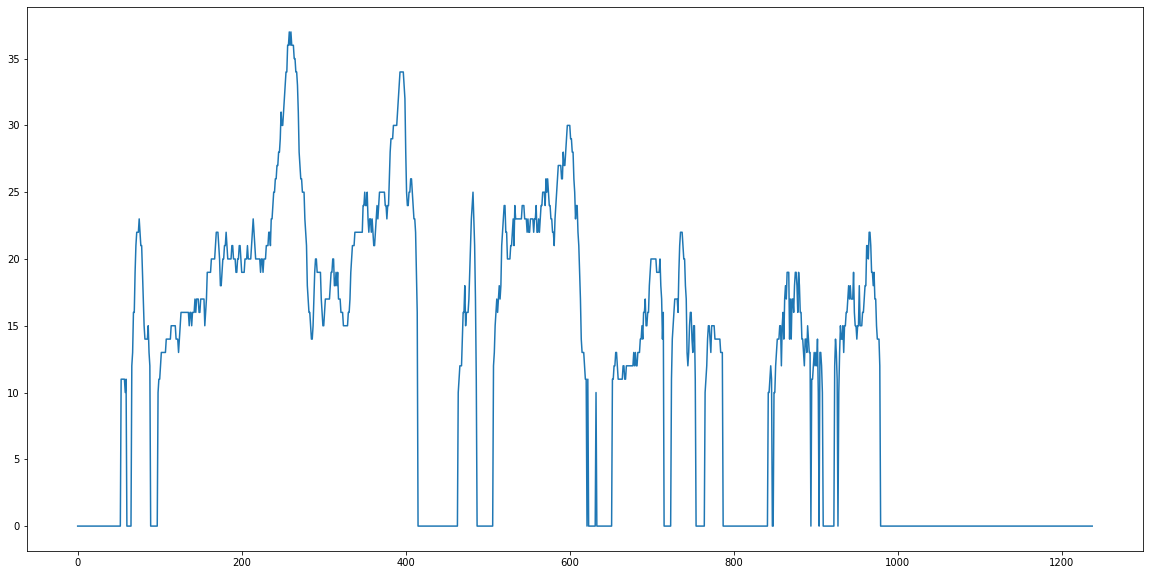

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(speed)), speed)
plt.show()

可以看到开了好多段，有加速有减速

### 速度平滑

但原始数据有点过于极端，比如速度数据会突然变成 0。我们用窗口来平滑一下，这里使用汉宁窗口，hanning，即利用窗口卷积平滑。

In [50]:
# 窗口大小为 10，即窗口内进行卷积操作
hanning_window_size = 5

In [51]:
hanning_weights = np.hanning(hanning_window_size)
speed_smooth = np.convolve(hanning_weights / hanning_weights.sum(), speed)[hanning_window_size - 1: -hanning_window_size + 1]

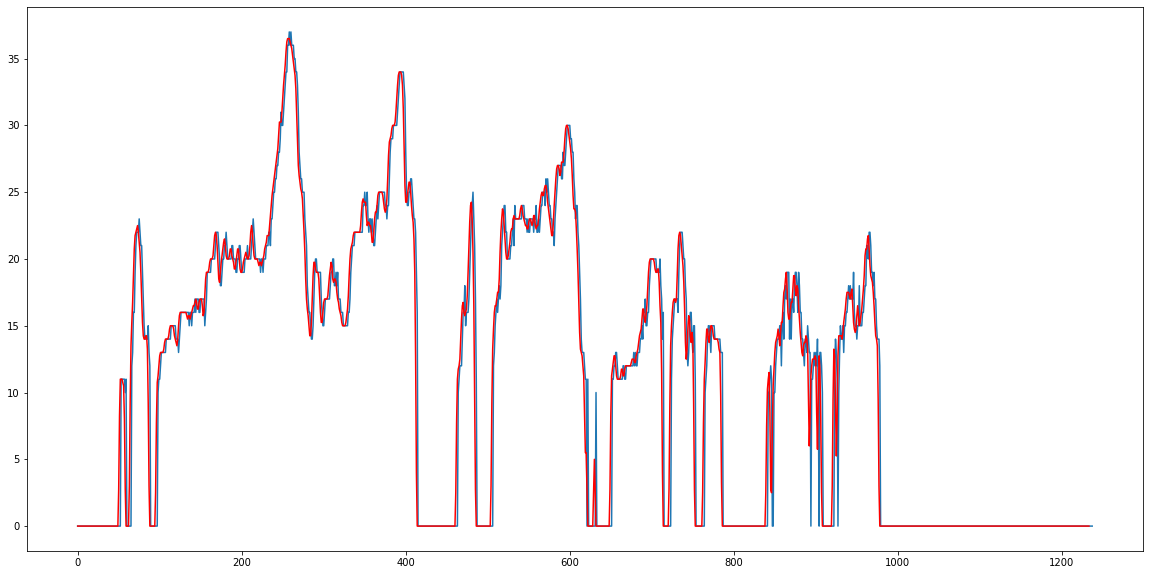

In [52]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(speed)), speed)
plt.plot(range(len(speed_smooth)), speed_smooth, color='red')
plt.show()

### 加速度处理

下面来分析下加速度情况

In [53]:
# 下移一行，方便前后速度作差
segdf_shift = segdf.shift(1)

In [54]:
segdf_speed_minus = segdf['gps_speed'] - segdf_shift['gps_speed'] 

In [55]:
segdf_speed_minus.describe()

count    1237.000000
mean        0.000000
std         2.044806
min       -16.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.000000
Name: gps_speed, dtype: float64

In [56]:
# 加速度 = 速度除以时间
segdf['acc'] = segdf_speed_minus / segdf['timestamp_minus']

In [57]:
segdf['acc'] = segdf['acc'].fillna(0)

In [58]:
segdf

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage,timestamp,timestamp_minus,acc
55432,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:53,0,9589,1.533579e+09,196.0,0.0
55433,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:56,0,9589,1.533579e+09,3.0,0.0
55434,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:57,0,9589,1.533579e+09,1.0,0.0
55435,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:58,0,9589,1.533579e+09,1.0,0.0
55436,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:00,0,9589,1.533579e+09,2.0,0.0
55437,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:01,0,9589,1.533579e+09,1.0,0.0
55438,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:02,0,9589,1.533579e+09,1.0,0.0
55439,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:04,0,9589,1.533579e+09,2.0,0.0
55440,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:05,0,9589,1.533579e+09,1.0,0.0
55441,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:06,0,9589,1.533579e+09,1.0,0.0


In [59]:
acc = segdf.acc

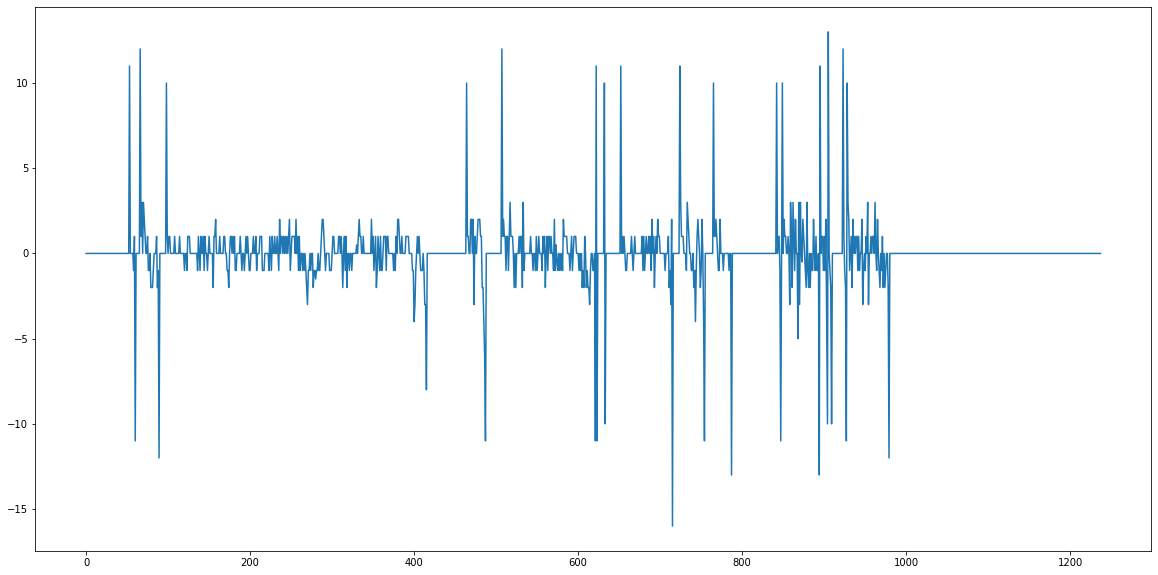

In [60]:
# 绘制加速度数据
plt.figure(figsize=(20, 10))
plt.plot(range(len(acc)), acc)
plt.show()

### 加速度数据平滑

其实照理来说加速度还蛮准的，不是脏数据。但原始数据有点过于极端。我们用窗口来平滑一下，这里还是使用汉宁窗口。

In [61]:
# 窗口大小为 5，即窗口内进行卷积操作
hanning_window_size = 5

In [62]:
hanning_weights = np.hanning(hanning_window_size)
acc_smooth = np.convolve(hanning_weights / hanning_weights.sum(), acc)[hanning_window_size - 1: -hanning_window_size + 1]

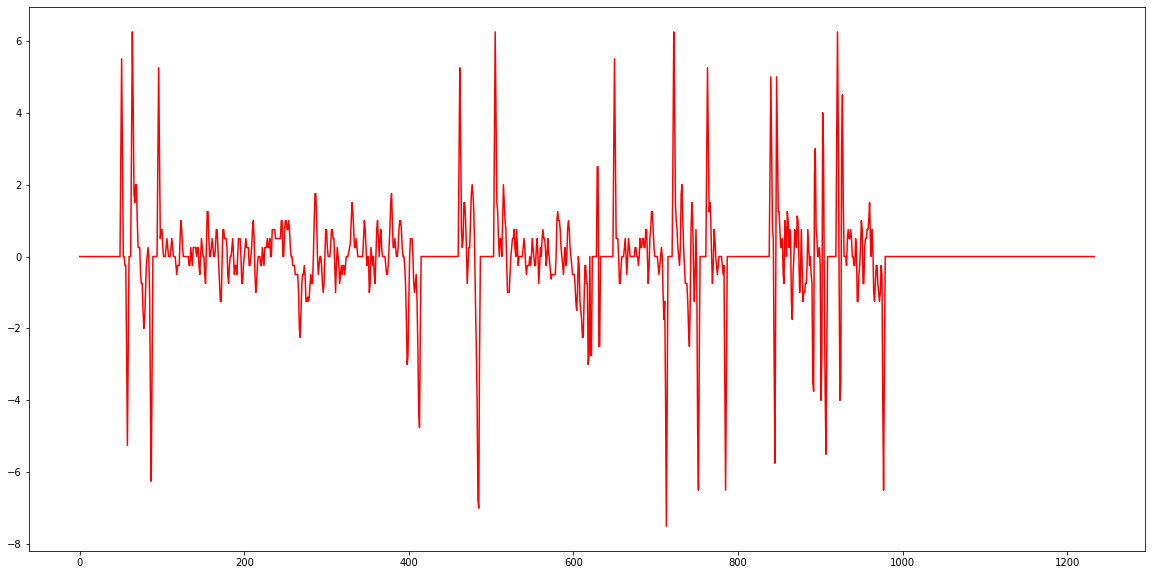

In [63]:
# 绘制平滑后的效果
plt.figure(figsize=(20, 10))
plt.plot(range(len(acc_smooth)), acc_smooth, color='red')
plt.show()

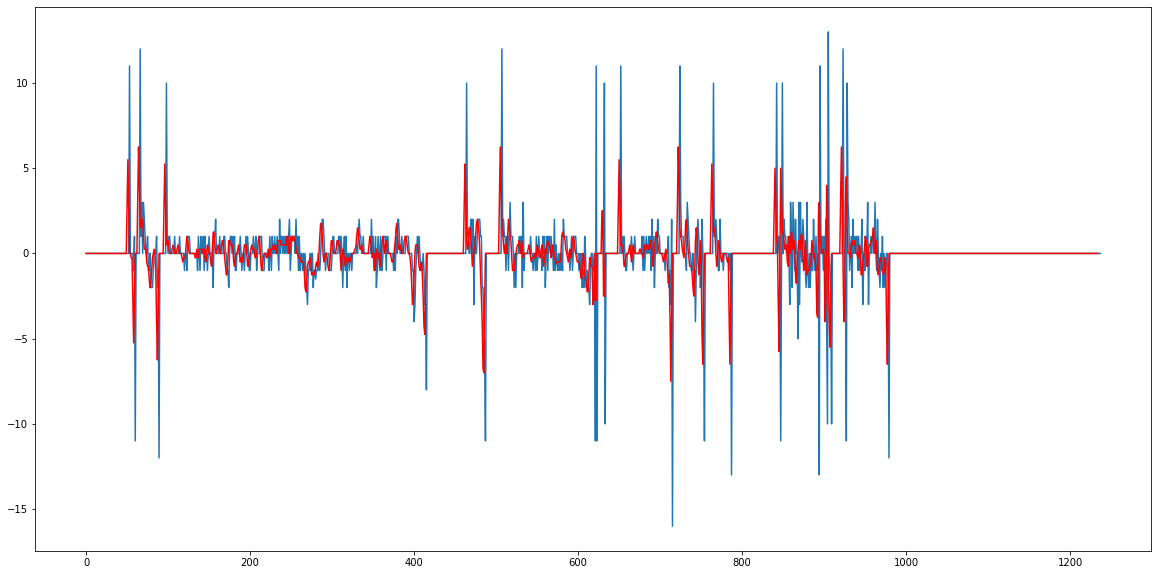

In [64]:
# 平滑前和平滑后的对比
plt.figure(figsize=(20, 10))
plt.plot(range(len(acc)), acc, label='raw')
plt.plot(range(len(acc_smooth)), acc_smooth, label='smooth', color='red')
plt.show()

窗口卷积平滑了之后，可以看到非常极端的数据就去除了。

所以我们后面就用平滑加速度吧，将平滑后的加速度赋值为加速度

### 统计下

In [65]:
segdf

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage,timestamp,timestamp_minus,acc
55432,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:53,0,9589,1.533579e+09,196.0,0.0
55433,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:56,0,9589,1.533579e+09,3.0,0.0
55434,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:57,0,9589,1.533579e+09,1.0,0.0
55435,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:01:58,0,9589,1.533579e+09,1.0,0.0
55436,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:00,0,9589,1.533579e+09,2.0,0.0
55437,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:01,0,9589,1.533579e+09,1.0,0.0
55438,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:02,0,9589,1.533579e+09,1.0,0.0
55439,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:04,0,9589,1.533579e+09,2.0,0.0
55440,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:05,0,9589,1.533579e+09,1.0,0.0
55441,AA00002,AAA9101002,151,115.927506,28.720826,1,0,0,0,0,2018-08-07 02:02:06,0,9589,1.533579e+09,1.0,0.0


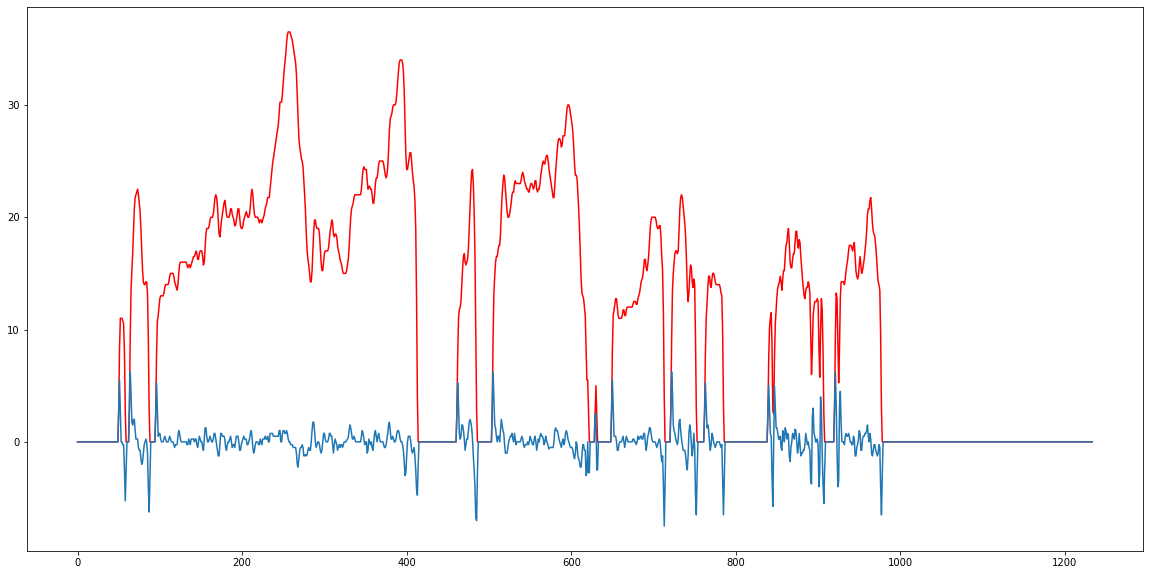

In [66]:
# 平滑前和平滑后的对比
plt.figure(figsize=(20, 10))
plt.plot(range(len(speed_smooth)), speed_smooth, color='red')
plt.plot(range(len(acc_smooth)), acc_smooth, label='smooth')
plt.show()

In [67]:
len(speed_smooth)

1234

In [68]:
len(acc_smooth)

1234

In [77]:
with open('lib/autoplait/data2.txt', 'w', encoding='utf-8') as f:
    for item1, item2 in zip(speed_smooth, acc_smooth):
        f.write(str(item1.item()) + ' ' + str(item2.item()) + '\n')

In [78]:
hanning_window_size = 5
hanning_weights = np.hanning(hanning_window_size)


In [81]:
speeds = []
accs = []
for rawdf_sub in rawdf_subs:
    segdf = rawdf_sub
    speed = segdf.gps_speed
    # 下移一行，方便前后速度作差
    segdf_shift = segdf.shift(1)
    segdf_speed_minus = segdf['gps_speed'] - segdf_shift['gps_speed']
    speed_smooth = np.convolve(hanning_weights / hanning_weights.sum(), speed)[hanning_window_size - 1: -hanning_window_size + 1]
    # 加速度 = 速度除以时间
    segdf['acc'] = segdf_speed_minus / segdf['timestamp_minus']
    segdf['acc'] = segdf['acc'].fillna(0)
    acc_smooth = np.convolve(hanning_weights / hanning_weights.sum(), acc)[hanning_window_size - 1: -hanning_window_size + 1]
    print('len', speed_smooth, acc_smooth)
    speeds += speed_smooth.tolist()
    accs += acc_smooth.tolist()

len [93.   92.75 92.   ...  0.    0.    0.  ] [0. 0. 0. ... 0. 0. 0.]
len [0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
len [ 0.    0.    0.   ... 95.75 95.   94.25] [0. 0. 0. ... 0. 0. 0.]
len [92. 92. 92. ...  0.  0.  0.] [0. 0. 0. ... 0. 0. 0.]
len [0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
len [0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]
len [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   2.75 5.5  2.75 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   

In [84]:
with open('lib/autoplait/data3.txt', 'w', encoding='utf-8') as f:
    for item1, item2 in zip(speeds, accs):
        f.write(str(item1) + ' ' + str(item2) + '\n')